<font size='6'><b> Visualizing the data </b></font>

There are three files in <b>OU-IneritialGaitData</b>: <b>AutomaticExtractionData_IMUZCenter</b>, <b>ManualExtractionData</b> and <b>Protocols</b>. 
(This .ipynb file is created in OU-IneritialGaitData file and use relative path to read the csv files)


<b>AutomaticExtractionData_IMUZCenter</b> contains 2 sequences with labels (level walk-1, level walk-2) of the automatically extracted subset of the center IMUZ.


<b>ManualExtractionData</b> contains 4 sequences with different labels (level walk-1, level walk-2, up-slope, and down-slope walks) of the manually extracted subsets by different equipments(Android,IMUZCenter,IMUZLeft,IMUZRight).

In [90]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def file_name(file_dir): 
    dic={}
    for root, dirs, files in os.walk(file_dir):
        dic[root]=files
#         print(root) #path
#         print(dirs) #subdirectory
#         print(files) #files in non-subdirectory
    return dic

In [3]:
AutomaticExtractionData=file_name('AutomaticExtractionData_IMUZCenter')

In [4]:
ManualExtractionData=file_name('ManualExtractionData')

In [5]:
ManualExtractionData_name=list(ManualExtractionData.keys())[1:]

In [6]:
label=pd.read_csv('IDGenderAgelist1.csv',dtype='object')

In [7]:
def change_ID_number(x):
    if len(x)==3:
        return ('000' + x)
    elif len(x)==4:
        return ('00' + x)
    elif len(x)==5:
        return ('0' + x)
    else:
        return x

In [8]:
label['adjusted_ID']=label['ID'].apply(lambda x: change_ID_number(x))

In [9]:
# x is adjusted_ID
# post is the post of the file name
# ls is the file name list
def file_name_with_ID(x,post,ls):
    for i in range(len(list(ls))):
        if (x == ls[i][5:11] and ls[i][12:]== post):
            return(ls[i])

In [10]:
label['AutomaticExtractionData_IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq0.csv',list(AutomaticExtractionData.values())[0]))
label['AutomaticExtractionData_IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq1.csv',list(AutomaticExtractionData.values())[0]))

In [11]:
label['ManualExtractionData/IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[0]]))

In [12]:
label['ManualExtractionData/IMUZRight_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[1]]))

In [13]:
label['ManualExtractionData/IMUZLeft_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[2]]))

In [14]:
label['ManualExtractionData/Android_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[3]]))

In [104]:
# label.to_csv('ID_Gender_Age_datasets.csv')

In [153]:
file_name=['AutomaticExtractionData_IMUZCenter','ManualExtractionData/IMUZCenter','ManualExtractionData/IMUZRight',
          'ManualExtractionData/IMUZLeft','ManualExtractionData/Android']
action_name=['_Walk_1','_Walk_2','_SlopeDown','_SlopeUp']

In [173]:
# file_name in list file_name
# action_name in list file_name
# ID number, input type is string
# label is file ID_Gender_Age_datasets.csv
# You can change the combination of file_name, action_name and ID
def plot_the_data(file_name,action_name,ID,label): 
    try:
        dataset_name= file_name + action_name
        path_name= file_name +'/'+label[label['ID']==ID][dataset_name].values[0]
        df=pd.read_csv(path_name,skiprows=2)
        insert_line=pd.DataFrame(df.columns.values).T
        df.columns=insert_line.columns
        df=pd.concat([insert_line,df],axis=0)
        df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
        print('Age: %s'%label[label['ID']==ID]['Age'].values[0])
        print('Gender(0:Female;1:Male): %s'%label[label['ID']==ID]['Gender(0:Female;1:Male)'].values[0])
        print('From the file: %s'%file_name)

        x = range(len(df)) 
        plt.figure(figsize=(18,10)) 
        plt.subplot(211)
        plt.plot(x,df['Gx'],"b",linewidth=1.5) 
        plt.plot(x,df['Gy'],"r",linewidth=1.5) 
        plt.plot(x,df['Gz'],"g",linewidth=1.2) 
        plt.ylabel("Angular velocity[Rad/s]")  
        plt.title("Level"+action_name) 
        plt.legend()
        ax = plt.gca()
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('data', 0))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.subplot(212)
        plt.plot(x,df['Ax'],"b",linewidth=1.5) 
        plt.plot(x,df['Ay'],"r",linewidth=1.5) 
        plt.plot(x,df['Az'],"g",linewidth=1.5) 
        plt.ylabel("Acceleration[g]")  
        plt.title("Level"+action_name) 
        plt.legend()
        ax = plt.gca()
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('data', 0))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.show()  
    except:
        print('This dataset/file is not exist')

Age: 33
Gender(0:Female;1:Male): 1
From the file: AutomaticExtractionData_IMUZCenter


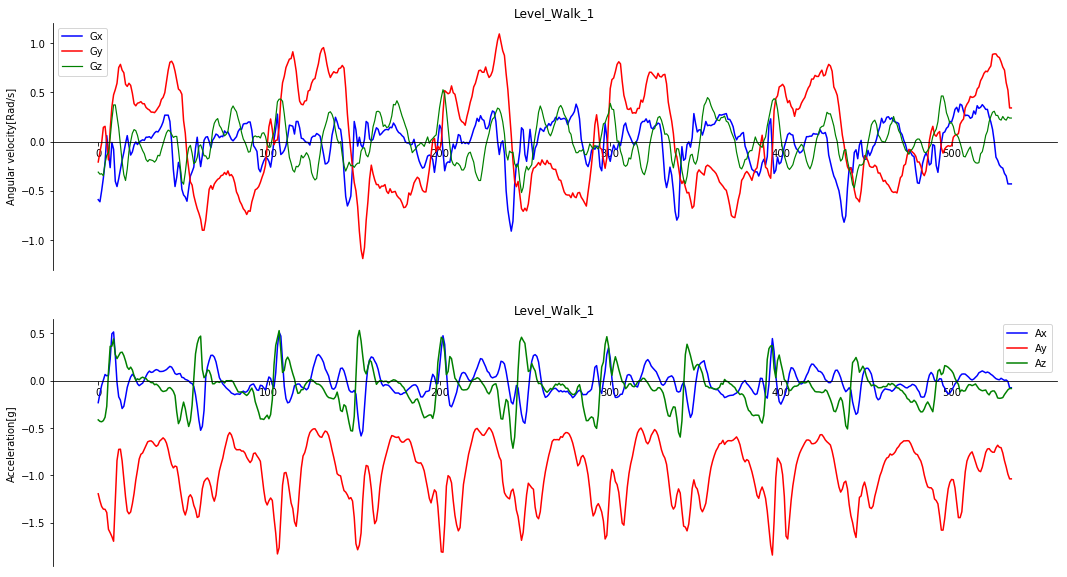

In [174]:
plot_the_data('AutomaticExtractionData_IMUZCenter','_Walk_1','104',label)

In [175]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 22 columns):
ID                                           763 non-null object
Gender(0:Female;1:Male)                      763 non-null object
Age                                          763 non-null object
adjusted_ID                                  763 non-null object
AutomaticExtractionData_IMUZCenter_Walk_1    744 non-null object
AutomaticExtractionData_IMUZCenter_Walk_2    744 non-null object
ManualExtractionData/IMUZCenter_Walk_1       496 non-null object
ManualExtractionData/IMUZCenter_Walk_2       496 non-null object
ManualExtractionData/IMUZCenter_SlopeDown    495 non-null object
ManualExtractionData/IMUZCenter_SlopeUp      489 non-null object
ManualExtractionData/IMUZRight_Walk_1        494 non-null object
ManualExtractionData/IMUZRight_Walk_2        494 non-null object
ManualExtractionData/IMUZRight_SlopeDown     493 non-null object
ManualExtractionData/IMUZRight_SlopeUp       487 n

In [168]:
len(label.dropna(axis=0))

381